# ARIM-Academy：　基礎編　Scikit-learn（分類モデル）

## 本編の目標

本演習では**『茶の元素分析データセット』**を用いて教師なし機械学習の分類技術を学びます。このデータセットには、4種類の茶葉（ブラックセイロン、ブラックトルコ、グリーンセイロン、グリーントルコ）の元素分析データが含まれています。

### 本編における内容
以下の内容に取り組みます。

* **データの可視化と解釈**: 散布図やペアプロットを用いて、特徴量の分布や相関関係を視覚的に把握します。
  
* **分類アルゴリズムの実装**: 決定木、ランダムフォレスト、サポートベクターマシーンらの分類アルゴリズムを実装し、それぞれの特徴を理解します。
  
* **モデル評価** : 混同行列を用いてモデルの予測結果と正解ラベルを比較し、性能を評価する方法を習得します。  
---

## データセット

**『茶の元素分析データセット』**は、ブラックセイロン(BC)、ブラックトルコ(BT)、グリーンセイロン(GC)、グリーントルコ(GT)の4種類の茶葉について、3つの濃度（1%、2%、3%）で抽出した液体の元素分析データです。誘導結合プラズマ発光分光分析法（ICP-OES）で分析された元素は、Al, Ca, Cd, Cr, Cu, Hg, Fe, K, Mg, Mn, Na, Pb, Znです。[1]

[1] Durmus, Y., Atasoy, A.D. & Atasoy, A.F. Mathematical optimization of multilinear and artificial neural network regressions for mineral composition of different tea types infusions. Sci Rep 14, 18285 (2024). https://doi.org/10.1038/s41598-024-69149-1

### 教材への接続
google colabにおけるオンラインの場合にこのラインを実行します。（<font color="red">Google colabに接続しない場合には不要</font>）

In [ ]:
!git clone https://github.com/ARIM-Academy/Advanced_Tutorial_1.git
%cd Advanced_Tutorial_1

# 1.データセットの読み込みと前処理

### ライブラリのインポート
カリキュラムで扱うpythonのライブラリを`import`文でロードします。機械学習のライブラリであるscikit-learnは後半でimportします。

In [3]:
#ライブラリ
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### サンプルファイルの読み込み
pandasライブラリの`read_csv()`はcsvファイルを読み込むメソッドであり、指定したファイルの読み込みます。ここでは[data]フォルダーに格納されているIris.csvのファイルのをデータフレームとして読み込み、そのデータフレームはdfという変数に格納します。

In [4]:
#データセットの読み込み
df=pd.read_csv("data/tea_data.csv")

In [5]:
#データセットの確認
df

Al     Ca        Cu     Fe       K      Mg      Mn     Na     Zn tea
0     3.297  4.356  0.031290  0.067   99.06   3.531   1.455  0.541  0.131  BT
1     4.267  4.118  0.031290  0.079  106.50   3.378   1.542  0.603  0.126  BT
2     4.088  4.763  0.033370  0.084  114.00   4.763   1.838  1.058  0.156  BT
3     4.338  4.556  0.033370  0.091  122.60   5.005   2.269  0.958  0.162  BT
4     4.732  5.138  0.035514  0.110  132.40   5.626   2.998  1.510  0.165  BT
..      ...    ...       ...    ...     ...     ...     ...    ...    ...  ..
163  16.690  8.895  0.153000  0.236  323.40  20.450  10.420  6.360  0.335  GC
164  17.620  8.909  0.177000  0.261  334.20  23.486  11.330  7.133  0.351  GC
165  17.920  9.056  0.180000  0.266  332.30  22.840  11.290  7.609  0.358  GC
166  17.820  9.128  0.175000  0.273  367.30  24.560  12.110  8.537  0.372  GC
167  17.650  9.048  0.197000  0.285  358.40  24.340  12.310  8.631  0.378  GC

[168 rows x 10 columns]

# 2. データの俯瞰（探索的データ分析）

### ①概要統計
元素分析で観測された９つの元素成分の概要統計を出力します。

In [6]:
#概要統計
df.describe()

Al          Ca          Cu          Fe           K          Mg  \
count  168.000000  168.000000  168.000000  168.000000  168.000000  168.000000   
mean     8.362315    6.047183    0.064047    0.140224  241.854405   14.455274   
std      5.168040    1.294278    0.034462    0.060822  106.663262    7.863688   
min      1.933000    3.792000    0.021600    0.049743   59.480000    3.002000   
25%      4.282000    5.093500    0.038274    0.089000  157.275000    8.183250   
50%      6.230000    6.029750    0.056000    0.136000  229.550000   13.755000   
75%     11.692500    6.879750    0.082000    0.178000  305.850000   18.919500   
max     20.910000    9.128000    0.197000    0.294000  505.600000   40.100000   

               Mn          Na          Zn  
count  168.000000  168.000000  168.000000  
mean     5.501926    3.350494    0.249317  
std      3.373980    1.646577    0.091466  
min      0.785000    0.541000    0.089000  
25%      3.238000    2.009750    0.175750  
50%      4.434500    3.092000    0.236500  
75%      7.687500    4.188000    0.309750  
max     14.290000    8.631000    0.491000

### ②　ペアプロット（散布図行列）

茶の元素分析データセットにペアプロットを適用することで、以下の情報を得ることができます。

* **特徴量間の関係**: 異なる特徴量間の関係を視覚的に確認できます。例えば、AlとZnが正の相関関係にあるか、負の相関関係にあるかなどを一目でわかります。
* **クラス間の分離性**: 各品種（ブラックセイロン(BC)、ブラックトルコ(BT)、グリーンセイロン(GC)、グリーントルコ(GT)）のデータがどのように分布しているか、他の品種とどの程度分離しているかを確認できます。
* **外れ値の検出**: データに含まれる外れ値を視覚的に確認することができます。
* **特徴量選択**: どの特徴量が品種の分類に最も貢献しているか、あるいは冗長な特徴量があるかなどを判断する手がかりになります。

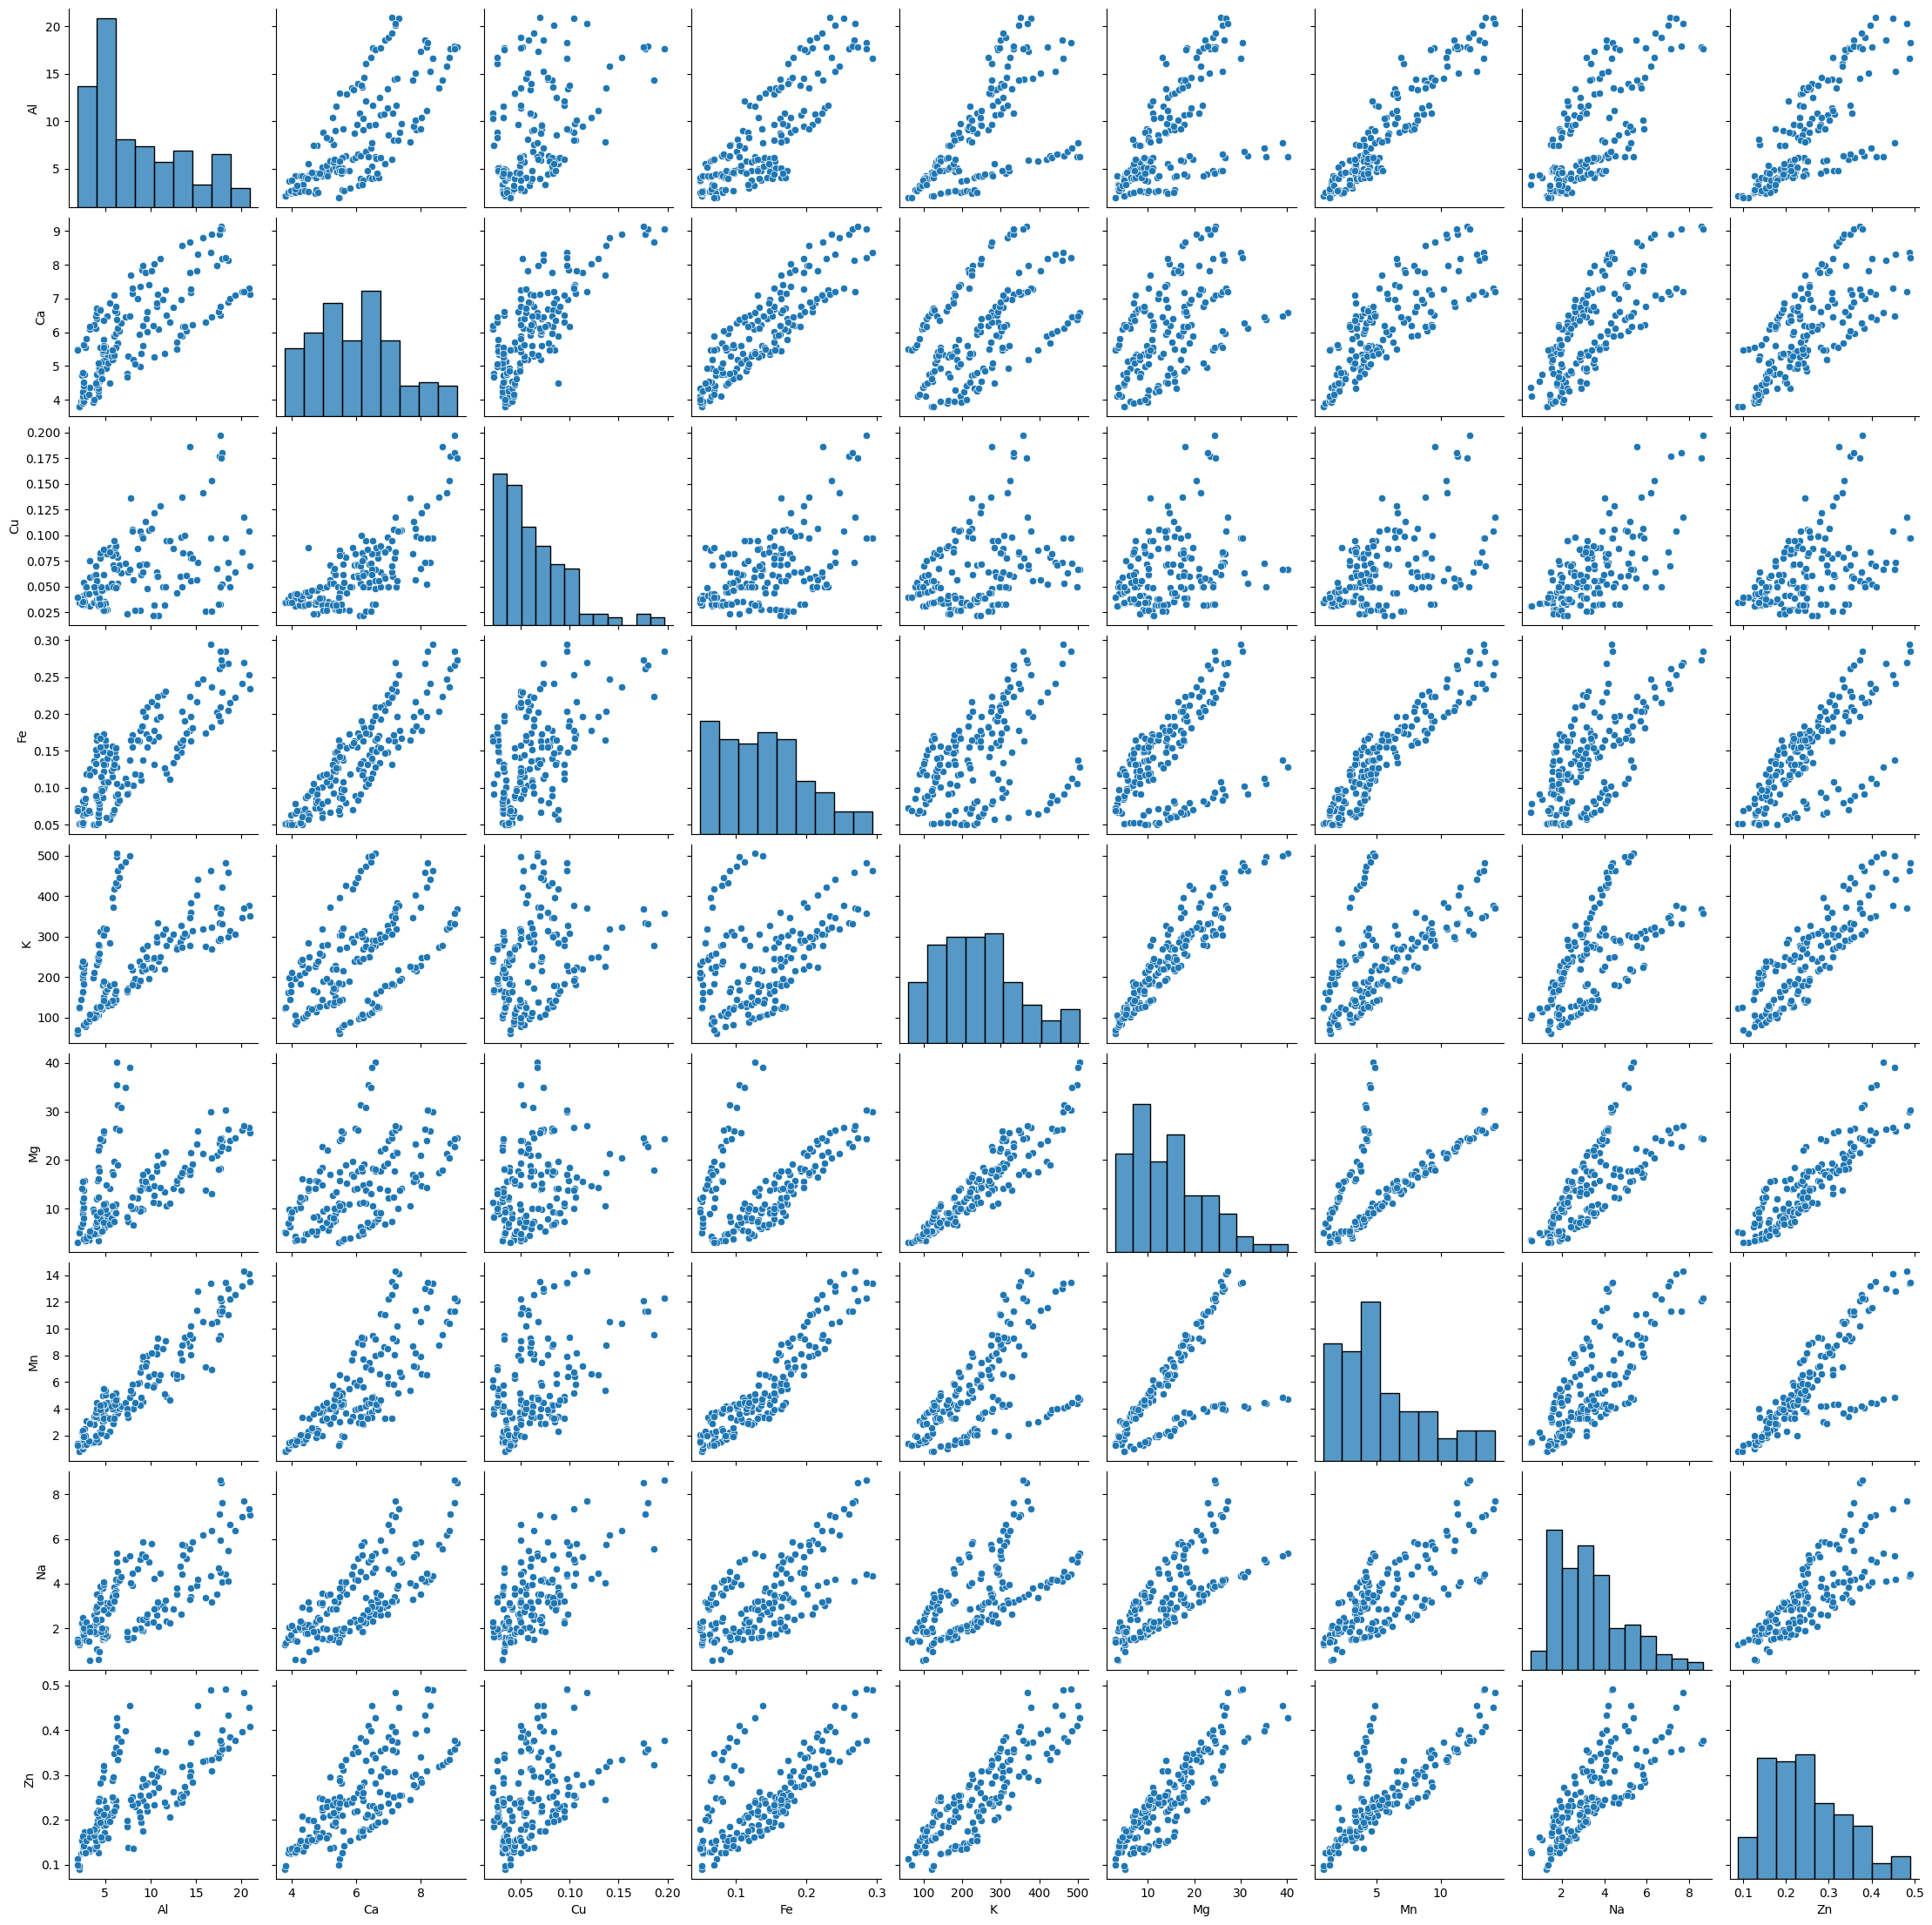

In [7]:
#　ペアプロットによる各変数間の二次元空間像
sns.pairplot(df)
plt.show()

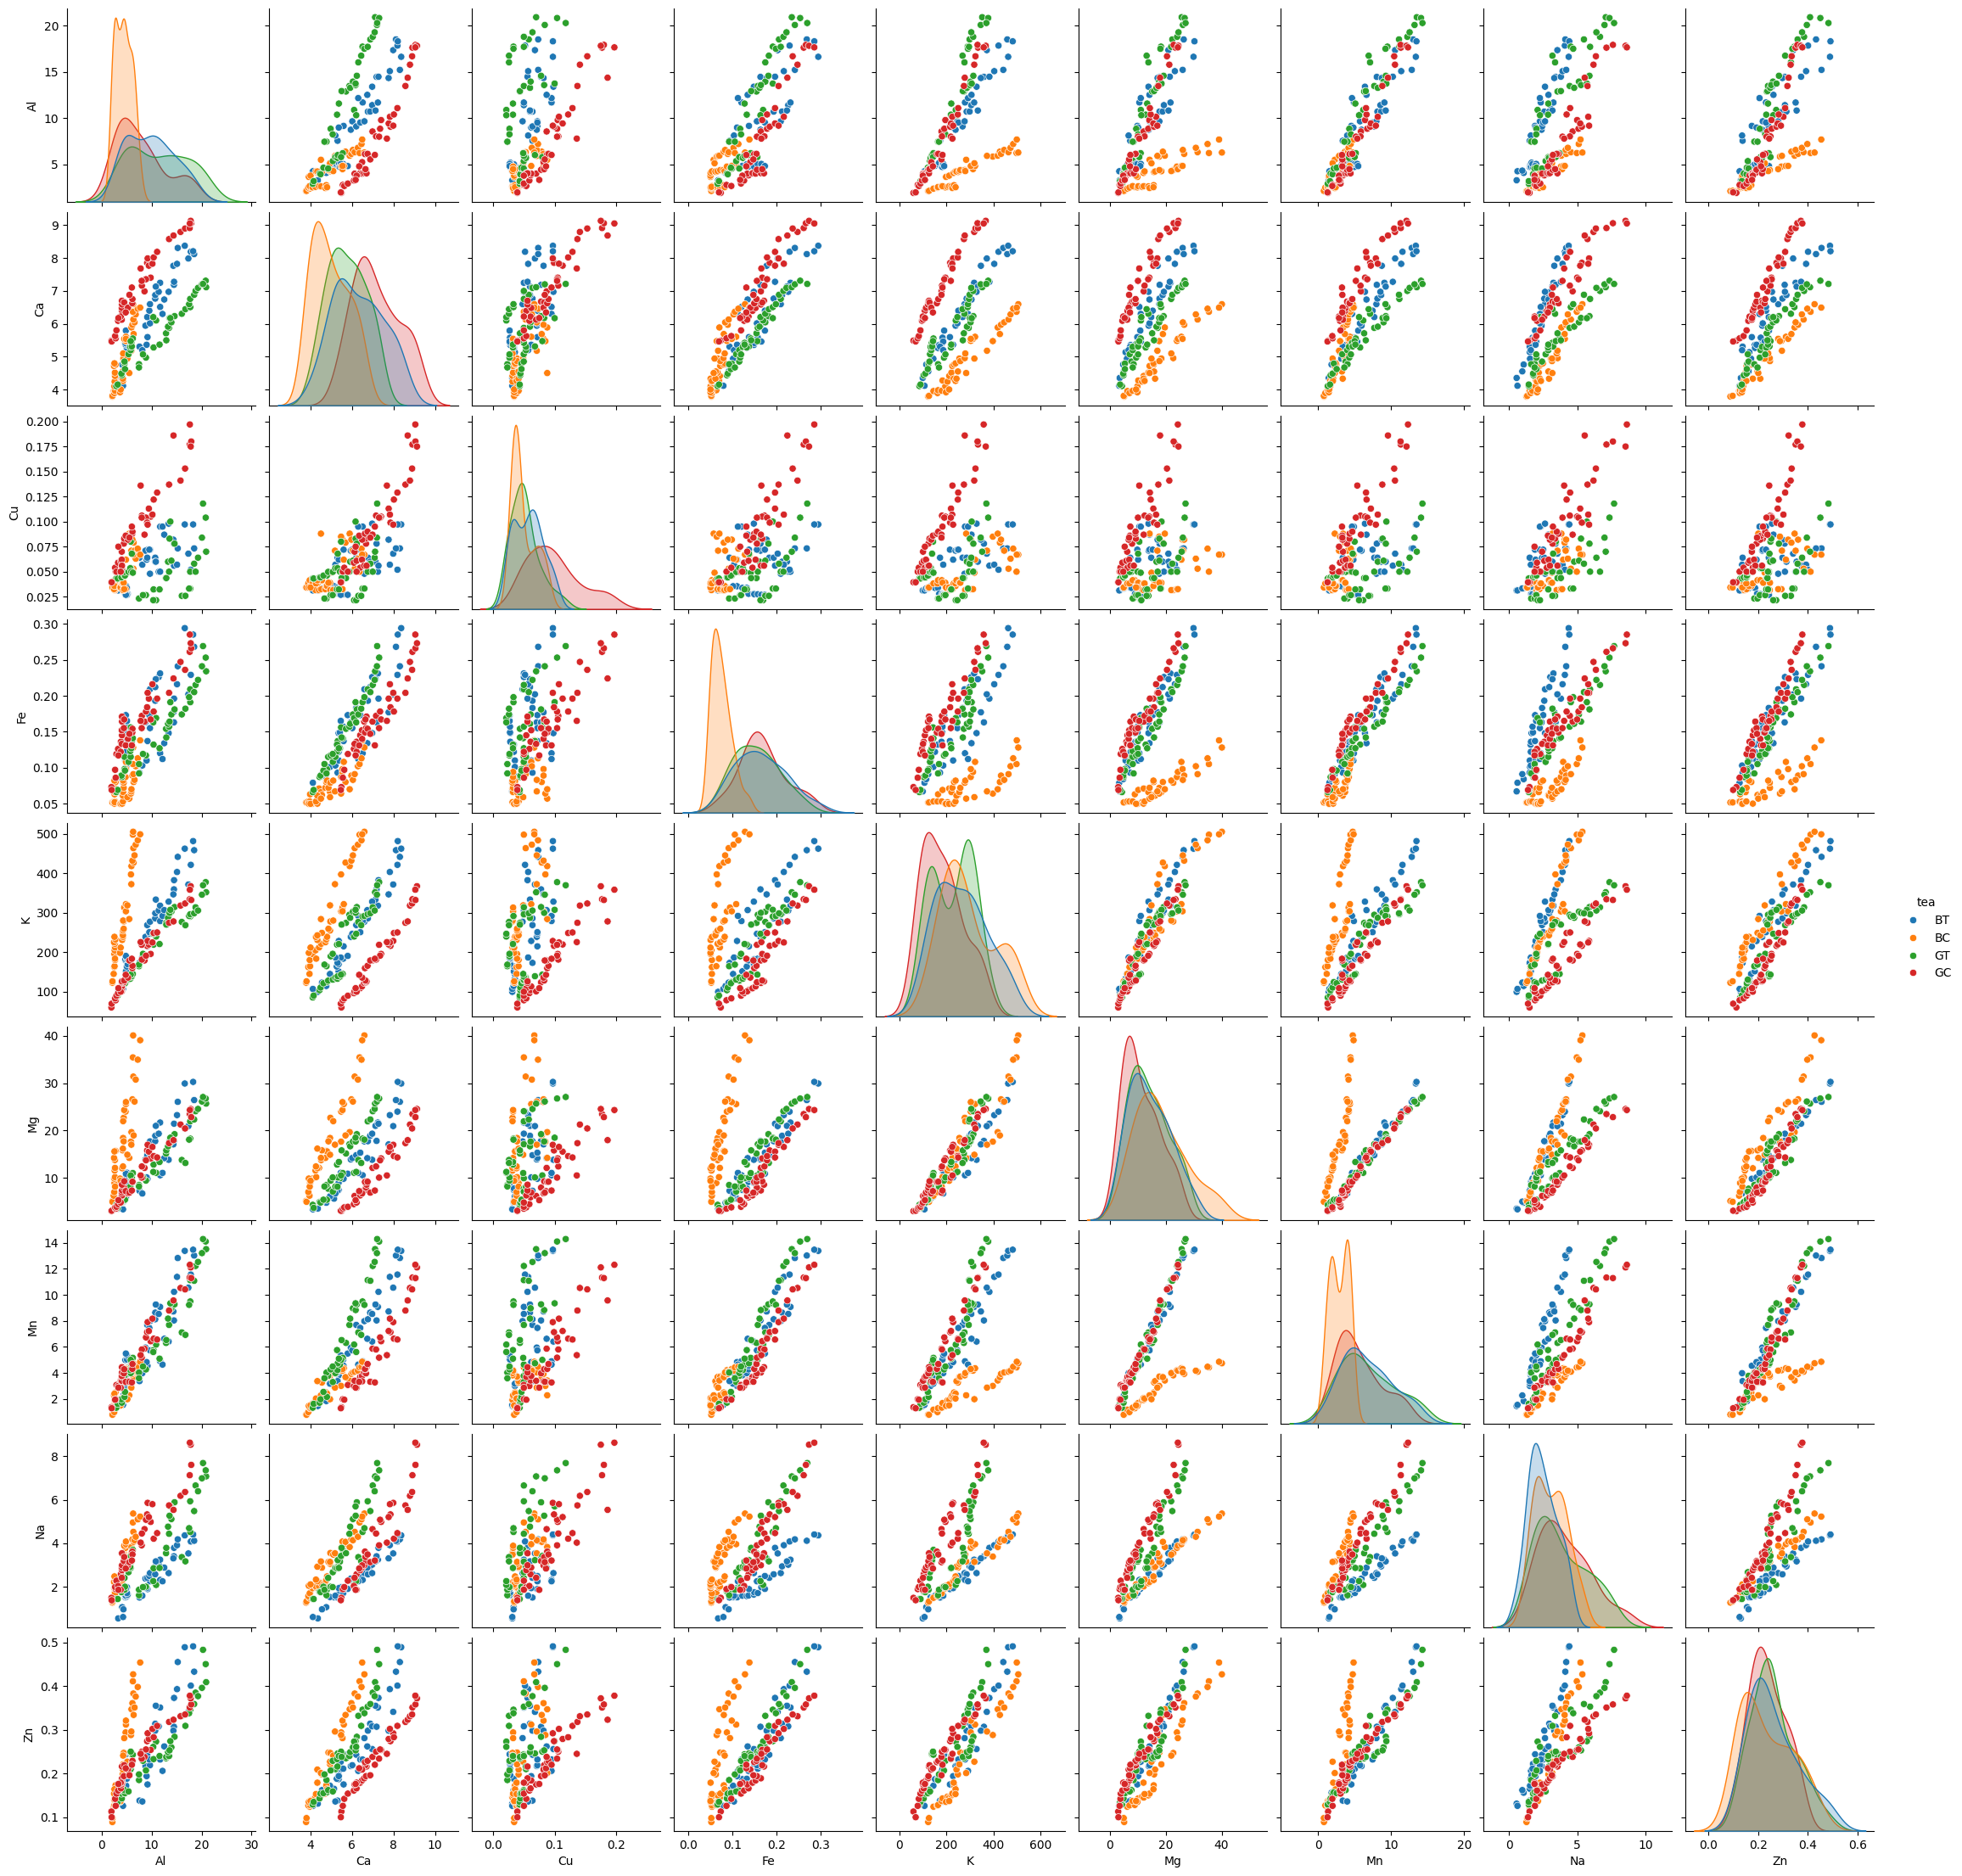

In [8]:
#　ペアプロットによる各変数間の二次元空間像（その２）
sns.pairplot(df,hue='tea')
plt.show()

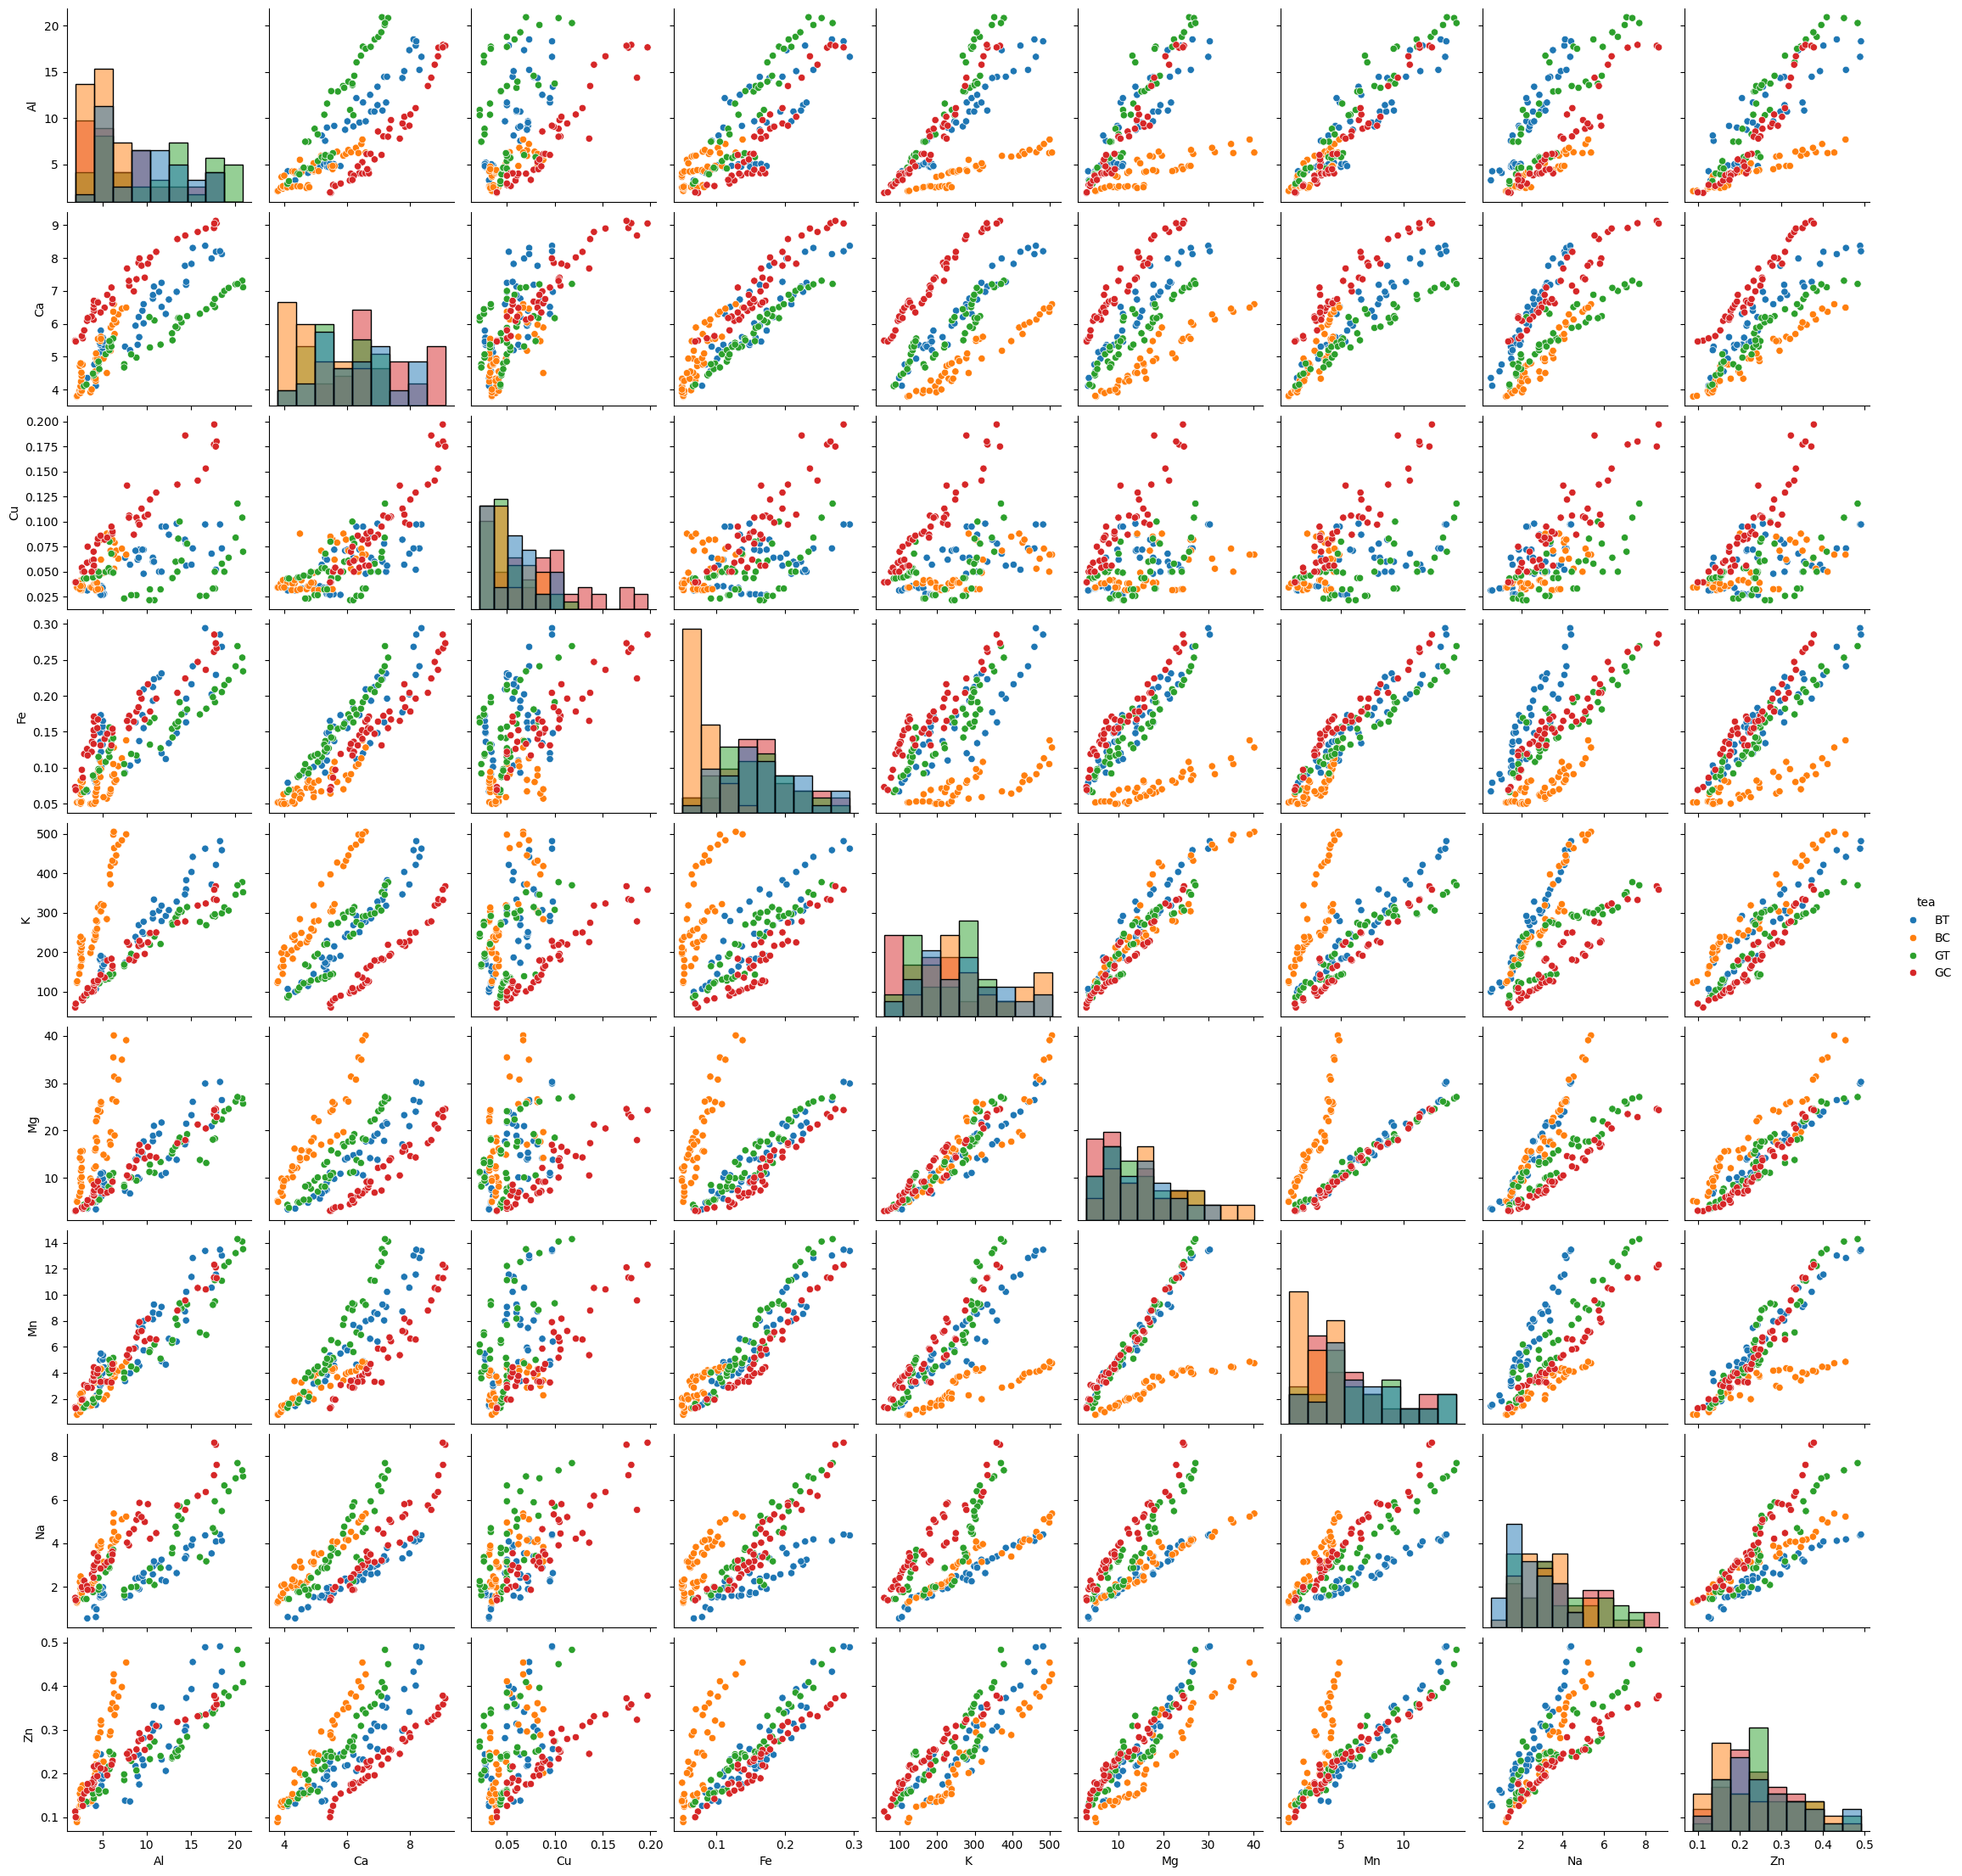

In [9]:
#　ペアプロットによる各変数間の二次元空間像（その３）
sns.pairplot(df,hue='tea',diag_kind='hist')
plt.show()

# 3. 機械学習モデルの比較

### データセットの分割（Data set splitting）
データセットの分割（Data set splitting）は、機械学習モデルの訓練と評価のために、データセットを訓練データとテストデータに分けるプロセスを指します。モデルがテストデータに対してどれくらい正確に予測できるかを評価することで、モデルの汎化能力や性能を測定します。

**訓練データ（Training Data）**：　機械学習モデルの訓練に使用されるデータセットです。モデルは、訓練データを分析してパターンや関連性を学習し、未知のデータに対して予測を行うための知識を獲得します。

**テストデータ（Test Data）**：モデルの訓練後に性能を評価するために使用されるデータセットです。テストデータは、訓練データとは異なるデータでなければなりません。

In [10]:
# 説明変数と目的変数の用意しましょう
X = df.iloc[0:, 0:9] #　元素分析値
y = df.iloc[0:, 9]   # 茶の品種

In [11]:
X

Al     Ca        Cu     Fe       K      Mg      Mn     Na     Zn
0     3.297  4.356  0.031290  0.067   99.06   3.531   1.455  0.541  0.131
1     4.267  4.118  0.031290  0.079  106.50   3.378   1.542  0.603  0.126
2     4.088  4.763  0.033370  0.084  114.00   4.763   1.838  1.058  0.156
3     4.338  4.556  0.033370  0.091  122.60   5.005   2.269  0.958  0.162
4     4.732  5.138  0.035514  0.110  132.40   5.626   2.998  1.510  0.165
..      ...    ...       ...    ...     ...     ...     ...    ...    ...
163  16.690  8.895  0.153000  0.236  323.40  20.450  10.420  6.360  0.335
164  17.620  8.909  0.177000  0.261  334.20  23.486  11.330  7.133  0.351
165  17.920  9.056  0.180000  0.266  332.30  22.840  11.290  7.609  0.358
166  17.820  9.128  0.175000  0.273  367.30  24.560  12.110  8.537  0.372
167  17.650  9.048  0.197000  0.285  358.40  24.340  12.310  8.631  0.378

[168 rows x 9 columns]

In [12]:
y

0      BT
1      BT
2      BT
3      BT
4      BT
       ..
163    GC
164    GC
165    GC
166    GC
167    GC
Name: tea, Length: 168, dtype: object

### 標準化
モデルはデータのスケールに敏感であるため、次元削減の前に標準化が必要です。特に線形回帰やサポートベクターマシン（SVM）などのアルゴリズムで重要です。これらのモデルは、特徴量のスケールが異なると結果に大きく影響を受けるため、データの標準化は不可欠な前処理のステップとなります。

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# データの標準化
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### データセットの分割（Data set splitting）
機械学習モデルの性能を正確に評価するためには、モデルを学習させる**訓練データ**と、学習済みのモデルの性能を評価するための**テストデータ**にデータを分割する必要があります。scikit-learnのtrain_test_split()関数を使用すると、この分割を簡単に実行できます。

In [15]:
#データセットの分割のライブラリの読み込み
from sklearn.model_selection import train_test_split

# train_test_split関数によるデータセット分割
X_train, X_test, y_train, y_test = train_test_split(X_std, y, 
                                                    test_size = 0.2,   # 20%をテストデータとするデータ分割
                                                    stratify = y,      # ４つの品種について均等分割
                                                    random_state=42
                                                    )  

In [16]:
X_train

array([[-0.4289679 ,  0.54541671,  0.75534295, ..., -0.24374084,
         0.08071417, -0.22279303],
       [-0.30301295,  0.18506893, -0.0304658 , ..., -0.39594405,
         0.5783784 ,  1.3891651 ],
       [ 1.83938559,  1.65900756, -0.35061011, ...,  1.80089527,
         0.44497758,  1.66330764],
       ...,
       [ 0.2074054 ,  1.33198227,  1.4247356 , ...,  0.51043797,
         1.13025575,  0.32549205],
       [ 0.39158297, -0.59374722, -0.92298934, ...,  0.07552918,
        -0.30608729, -0.17893022],
       [-1.10299183, -0.3240676 , -0.29240206, ..., -1.05886038,
        -0.83238092, -1.17680906]])

In [17]:
y_train

145    GC
79     BC
37     BT
29     BT
7      BT
       ..
112    GT
96     GT
151    GC
102    GT
129    GC
Name: tea, Length: 134, dtype: object

### scikit-learnによる分類モデルの選択

scikit-learnは、機械学習のアルゴリズムをPythonで実装するためのライブラリです。特に、分類問題においては、ロジスティック回帰、k近傍法、サポートベクターマシン、決定木、ランダムフォレスト、ニューラルネットワークなど、様々なアルゴリズムが提供されています。どのモデルを選ぶべきかは、**データの特性**（線形か非線形か、データの量、ノイズの有無など）や、**タスクの要件**（精度、解釈性、計算時間など）によって異なります。

**主な分類モデルの特徴**

* **ロジスティック回帰:**
  - 線形モデルの一種で、入力データからクラスの所属確率を予測します。
  - データが線形に分離可能な場合や、特徴量の重要度を把握したい場合に適しています。
* **k近傍法:**
  - 新しいデータ点に対して、最も近いk個のデータ点のラベルを参照して、そのデータ点のラベルを決定します。
  - データが局所的な構造を持つ場合や、非線形な境界を持つ場合に有効です。
* **サポートベクターマシン:**
  - データを最もよく分離する超平面（決定境界）を見つけ、新しいデータを分類します。
  - マージン最大化という概念に基づいており、一般化性能が高いことが期待できます。
* **決定木:**
  - データを順次分割していくことで、決定規則を樹形図で表現するモデルです。
  - 非線形な関係を捉えることができ、解釈性が高い点が特徴です。
* **ランダムフォレスト:**
  - 複数の決定木を組み合わせることで、過学習を防ぎ、汎化性能を向上させたモデルです。
  - さまざまな種類のデータに対して高い精度を発揮します。
* **ニューラルネットワーク:**
  - 人間の脳神経回路を模倣したモデルで、複雑なパターンを学習することができます。
  - 大規模なデータセットや画像認識、自然言語処理など、高度なタスクに適用されます。

**モデル選択のポイント**

* **データの探索:** データの分布、特徴量間の関係、外れ値などを可視化し、データの特性を把握します。
* **アルゴリズムの特性:** 各アルゴリズムの強みと弱みを理解し、データの特性に合ったアルゴリズムを選びます。
* **ハイパーパラメータチューニング:** アルゴリズムのパラメータを調整することで、モデルの性能を向上させることができます。
* **交差検証:** モデルの汎化性能を評価するために、交差検証を行います。

scikit-learnは、様々な分類モデルを提供しており、適切なモデルを選択することで、高い精度で分類問題を解決することができます。モデル選択は、データの特性やタスクの要件に合わせて、慎重に行う必要があります。ここでは決定木、ランダムフォレスト、サポートベクターマシーンの3つについてのモデルを検討します。

## 1. 決定木
決定木は、データの属性値を基に、一連のif-thenルールを適用することで、目的変数を予測する非線形モデルです。

### ①　モデル構築
DecisionTreeClassifier クラスは、Scikit-learnライブラリが提供するクラスで、分類型による決定木モデルを構築するために使用されます。

In [18]:
# 決定木法のインポート（クラス指定）
from sklearn.tree import DecisionTreeClassifier

# 決定木法によるモデル構築（トレーニング）
model = DecisionTreeClassifier()
model.fit(X_train, y_train)   

DecisionTreeClassifier()

#### ②　モデルの評価：精度の計算
#### 訓練データ

In [19]:
#訓練データの予測ラベル
y_pred_train = model.predict(X_train)

In [20]:
# 訓練データの精度
r2_score = model.score(X_train, y_train)
print('訓練データ決定係数:{:.3f}'.format(r2_score))

訓練データ決定係数:1.000


#### テストデータ

In [21]:
#テストデータの予測ラベル
y_pred_test = model.predict(X_test)

In [22]:
# テストデータの精度
r2_score = model.score(X_test, y_test)
print('テストデータ決定係数:{:.3f}'.format(r2_score))

テストデータ決定係数:0.853


### ③　混同行列

混同行列は、機械学習の分類問題において、モデルの性能を評価するために用いられる指標です。特に、不均衡データ（あるクラスのデータが圧倒的に多いデータセット）や、コスト感度の高い誤分類（ある種類の誤分類が他の種類よりも重大な場合）を扱う際に、これらの指標は非常に有効です。  

混同行列:予測結果と実際のラベルを2×2の表にまとめたもので、表の各要素は、以下の4つの状態を表します。  
* TP (True Positive): 正しく陽性と予測  
* FP (False Positive): 誤って陽性と予測（偽陽性）  
* TN (True Negative): 正しく陰性と予測  
* FN (False Negative): 誤って陰性と予測（偽陰性）  

混同行列から、精度、適合率、再現率などの評価指標を計算できます。  

#### 訓練データ

**混同行列の算出　その１**  
sklearn.metrics モジュールにある混同行列を計算するための関数 confusion_matrix を用いる方法です。なお、sklearn.metrics はscikit-learnライブラリが提供する様々な評価指標を計算するための関数群です。

In [23]:
# scikit-learnのconfution_matrixを使った混同行列の表記方法

from sklearn import metrics
print(metrics.confusion_matrix(y_pred_train, y_train))

[[33  0  0  0]
 [ 0 34  0  0]
 [ 0  0 33  0]
 [ 0  0  0 34]]


**混同行列の算出　その2**  
Pandasライブラリのcrosstab関数を使用して、混同行列を作成します。

In [24]:
# pandasのcrosstbを使った混同行列の別の表記方法

pd.crosstab(y_pred_train, y_train, margins = True) 

tea    BC  BT  GC  GT  All
row_0                     
BC     33   0   0   0   33
BT      0  34   0   0   34
GC      0   0  33   0   33
GT      0   0   0  34   34
All    33  34  33  34  134

#### テストデータ

In [25]:
# pandasのcrosstbを使った混同行列の別の表記方法

pd.crosstab(y_pred_test, y_test, margins = True) 

tea    BC  BT  GC  GT  All
row_0                     
BC      9   2   0   1   12
BT      0   6   0   1    7
GC      0   0   9   1   10
GT      0   0   0   5    5
All     9   8   9   8   34

In [26]:
print(metrics.confusion_matrix(y_pred_test, y_test))

[[9 2 0 1]
 [0 6 0 1]
 [0 0 9 1]
 [0 0 0 5]]


## 2. ランダムフォレスト
RandomForestClassifier クラスは、Scikit-learnライブラリが提供するクラスで、分類型によるランダムフォレストモデルを構築するために使用されます。

#### ①モデル構築

In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)   

RandomForestClassifier()

### ②　モデルの評価：精度の計算および混同行列
#### 訓練データ

In [28]:
y_pred_train = model.predict(X_train)

In [29]:
print ("RandomForestClassifier training score : {:.3f}".format(model.score(X_train, y_train)))
pd.crosstab(y_pred_train, y_train, margins = True) 

RandomForestClassifier training score : 1.000


tea    BC  BT  GC  GT  All
row_0                     
BC     33   0   0   0   33
BT      0  34   0   0   34
GC      0   0  33   0   33
GT      0   0   0  34   34
All    33  34  33  34  134

#### テストデータ

In [30]:
y_pred_test = model.predict(X_test)  

In [31]:
print ("RandomForestClassifier test score : {:.3f}".format(model.score(X_test, y_test)))
pd.crosstab(y_pred_test, y_test, margins = True) 

RandomForestClassifier test score : 1.000


tea    BC  BT  GC  GT  All
row_0                     
BC      9   0   0   0    9
BT      0   8   0   0    8
GC      0   0   9   0    9
GT      0   0   0   8    8
All     9   8   9   8   34

### 3.サポートベクターマシーン

SVC クラスは、Scikit-learnライブラリが提供するクラスで、分類型によるサポートベクターマシーンモデルを構築するために使用されます。

### ① モデル構築

In [32]:
# サポートベクター
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)   

SVC()

### ②　モデルの評価：精度の計算および混同行列
#### 訓練データ

In [33]:
y_pred_train = model.predict(X_train)

In [34]:
print ("SupportVectorClassifier training score : {:,.3f}".format(model.score(X_train, y_train)))
pd.crosstab(y_pred_train, y_train, margins = True) 

SupportVectorClassifier training score : 0.978


tea    BC  BT  GC  GT  All
row_0                     
BC     33   0   0   1   34
BT      0  34   0   2   36
GC      0   0  33   0   33
GT      0   0   0  31   31
All    33  34  33  34  134

#### テストデータ

In [35]:
y_pred_test = model.predict(X_test)

In [36]:
print ("SupportVectorClassifier test score : {:,.3f}".format(model.score(X_test, y_test)))
pd.crosstab(y_pred_test, y_test, margins = True) 

SupportVectorClassifier test score : 0.912


tea    BC  BT  GC  GT  All
row_0                     
BC      9   0   0   1   10
BT      0   8   0   2   10
GC      0   0   9   0    9
GT      0   0   0   5    5
All     9   8   9   8   34